In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import time
import collections
from citipy import citipy
import itertools

# Import API Key
from config import api_key

# Save Output
output = "Output/cities.csv"

In [2]:
#Lists to Hold Values
lats_lngs = []
cities = []


# Generate Combinations of Latitude & Longitude
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)

lats_lngs = zip(lats, lngs)

# Find Closest City based on Combinations
for lat_lng in lats_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# Append City, if not in list
    if city not in cities:
        cities.append(city)
    
# Confirm Number of Values  
print(len(cities))

769


In [3]:
# Base URL
base = "http://api.openweathermap.org/data/2.5/weather?q="

In [4]:
# Lists to Add Values
city_2 = []
country_2 = []
date_2 = []
lat_2 = []
lng_2 = []
temp_2 = []
hum_2 = []
cloud_2 = []
wind_2 = []

In [5]:
# Begin Retrieval 
print("Beginning Data Retrieval")
print("-"*15)

# Variables to Track Weather Retrieval
rec_num = 1
rec_set = 1
    
# For Loop to Generate Data
for city in cities:
    
    # Record/Set Count; Pause Calls to not exceed 60 per minute
    if rec_num == 51:
        rec_set += 1
        rec_num = 1
        time.sleep(60)
        
    # Request API URL
    request_url = base + city + "&units=imperial&appid=" + api_key

    # Data Retrieval Message
    print(f"Processing Record {rec_num} of Set {rec_set} | {city}")
        
    # Next Record
    rec_num += 1
        
    try:

        # API Call
        response = requests.get(request_url).json()
        
        # Append Data to Lists
        city_2.append(response["name"])
        country_2.append(response["sys"]["country"])
        date_2.append(response["dt"])
        lat_2.append(response["coord"]["lat"])
        lng_2.append(response["coord"]["lon"])
        temp_2.append(response["main"]["temp_max"])
        hum_2.append(response["main"]["humidity"])
        cloud_2.append(response["clouds"]["all"])
        wind_2.append(response["wind"]["speed"])
        
        # EXCEPTIONS
    except (KeyError, IndexError):
        #print(request_url)
        print("City not found. Skipping...")
                    
# Retrieval Complete
print("-"*15)
print("Data Retrieval Completed")
print("-"*15)

Beginning Data Retrieval
---------------
Processing Record 1 of Set 1 | tuktoyaktuk
Processing Record 2 of Set 1 | carnarvon
Processing Record 3 of Set 1 | caravelas
Processing Record 4 of Set 1 | gushikawa
Processing Record 5 of Set 1 | atherton
Processing Record 6 of Set 1 | namatanai
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | bataipora
Processing Record 9 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 10 of Set 1 | port hardy
Processing Record 11 of Set 1 | meulaboh
Processing Record 12 of Set 1 | georgetown
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | samusu
City not found. Skipping...
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | hilo
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | lebu
Processing Record 19 of Set 1 | husavik
Processing Record 20 of Set 1 | balaipungut
Processing Record 21 of Set 1 | bredasdorp
Processing Record 22 of Set 1 | itupiranga
Pro

In [6]:
# Lists in Dictionary
weather = {"City": city_2, "Country": country_2, "Date": date_2, "Lat": lat_2, "Lng": lng_2,
           "Max Temp": temp_2, "Humidity": hum_2, "Cloudiness": cloud_2, "Wind Speed": wind_2}

In [7]:
# Dictionary to DataFrame
weather_df = pd.DataFrame(weather)
weather_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tuktoyaktuk,CA,1600563790,69.45,-133.04,48.20,76,75,12.75
1,Carnarvon,AU,1600563928,-24.87,113.63,62.60,55,90,14.99
2,Caravelas,BR,1600563929,-17.71,-39.25,73.36,82,0,9.01
3,Gushikawa,JP,1600563929,26.35,127.87,82.40,83,20,5.82
4,Atherton,GB,1600563929,53.52,-2.49,54.00,80,14,1.99
...,...,...,...,...,...,...,...,...,...
706,Bedi,IN,1600565000,22.50,70.05,82.08,81,42,8.19
707,Dalby,AU,1600565000,-27.18,151.27,75.20,50,40,12.75
708,Teupasenti,HN,1600565000,14.22,-86.70,77.00,61,40,2.24
709,Christchurch,NZ,1600564743,-43.53,172.63,57.99,67,0,14.99


In [8]:
# Save DataFrame
weather_df.to_csv("Output/cities_weather.csv", index=False, header=True)

In [9]:
# Check if any Humidity values are >100
weather_df[weather_df.Humidity > 100]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed


In [10]:
# Seaborn
import seaborn as sns

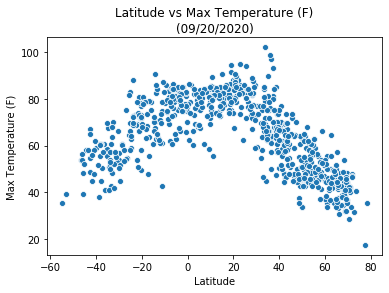

In [15]:
sns.scatterplot(x="Lat", y="Max Temp", data=weather_df)
plt.title("Latitude vs Max Temperature (F)\n(09/20/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("Output/LatitudevsTemperature.png")
plt.show()

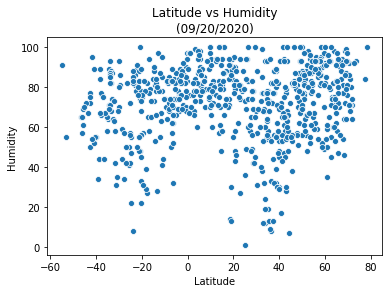

In [17]:
sns.scatterplot(x="Lat", y="Humidity", data=weather_df)
plt.title("Latitude vs Humidity\n(09/20/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("Output/LatitudevsHumidity.png")
plt.show()

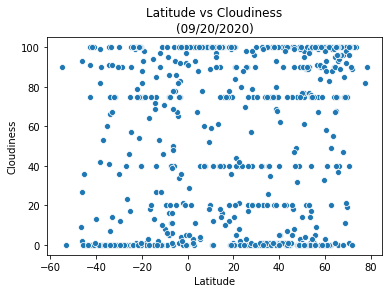

In [18]:
sns.scatterplot(x="Lat", y="Cloudiness", data=weather_df)
plt.title("Latitude vs Cloudiness\n(09/20/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("Output/LatitudevsCloudiness.png")
plt.show()

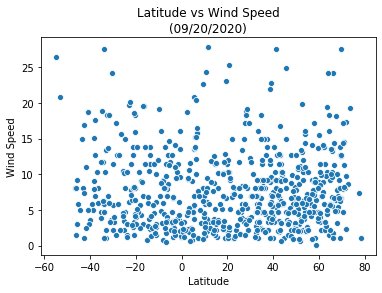

In [20]:
sns.scatterplot(x="Lat", y="Wind Speed", data=weather_df)
plt.title("Latitude vs Wind Speed\n(09/20/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("Output/LatitudevsWindSpeed.png")
plt.show()

LINEAR REGRESSION

In [30]:
# Dependencies
import scipy.stats as st
# Query to Split Latitude
north_hemi = weather_df.query(f"Lat >= 0")
south_hemi = weather_df.query(f"Lat <= 0")

The r-value is: -0.8276944075369342


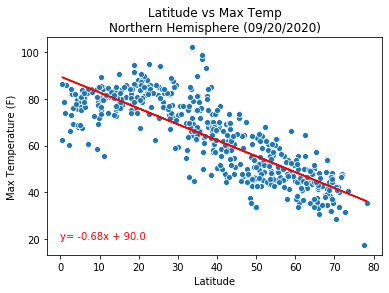

In [71]:
x_values=north_hemi["Lat"]
y_values=north_hemi["Max Temp"]
sns.scatterplot(x=x_values, y=y_values)
plt.title("Latitude vs Max Temp\nNorthern Hemisphere (09/20/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
(slope, intercept, rvalues, pvalue, stderr) = st.linregress(x_values, y_values)
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept))
regress = x_values * slope + intercept
plt.annotate(line_eq, (0, 20), color="red")
plt.plot(x_values, regress, "r-")
print(f"The r-value is: " + str(rvalues))
plt.savefig("Output/N_LatitudevsMaxTemp.png")

The r-value is: 0.7396489668602718


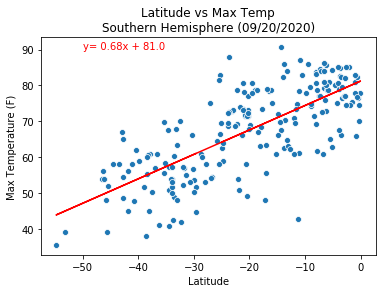

In [72]:
x_values=south_hemi["Lat"]
y_values=south_hemi["Max Temp"]
sns.scatterplot(x=x_values, y=y_values)
plt.title("Latitude vs Max Temp\nSouthern Hemisphere (09/20/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
(slope, intercept, rvalues, pvalue, stderr) = st.linregress(x_values, y_values)
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept))
regress = x_values * slope + intercept
plt.annotate(line_eq, (-50, 90), color="red")
plt.plot(x_values, regress, "r-")
print(f"The r-value is: " + str(rvalues))
plt.savefig("Output/S_LatitudevsMaxTemp.png")

The r-value is: 0.02145931353437881


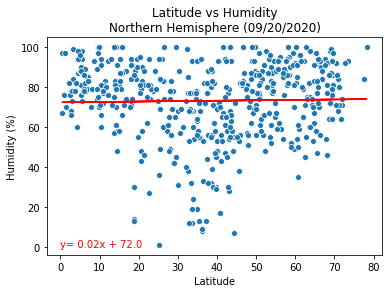

In [73]:
x_values=north_hemi["Lat"]
y_values=north_hemi["Humidity"]
sns.scatterplot(x=x_values, y=y_values)
plt.title("Latitude vs Humidity\nNorthern Hemisphere (09/20/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
(slope, intercept, rvalues, pvalue, stderr) = st.linregress(x_values, y_values)
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept))
regress = x_values * slope + intercept
plt.annotate(line_eq, (0, 0), color="red")
plt.plot(x_values, regress, "r-")
print(f"The r-value is: " + str(rvalues))
plt.savefig("Output/N_LatitudevsHumidity.png")

The r-value is: 0.20083531415815653


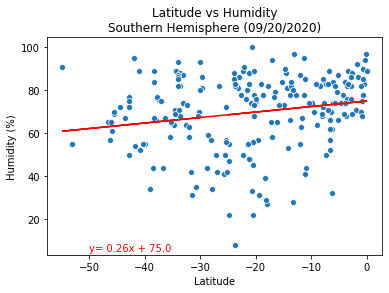

In [74]:
x_values=south_hemi["Lat"]
y_values=south_hemi["Humidity"]
sns.scatterplot(x=x_values, y=y_values)
plt.title("Latitude vs Humidity\nSouthern Hemisphere (09/20/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
(slope, intercept, rvalues, pvalue, stderr) = st.linregress(x_values, y_values)
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept))
regress = x_values * slope + intercept
plt.annotate(line_eq, (-50, 5), color="red")
plt.plot(x_values, regress, "r-")
print(f"The r-value is: " + str(rvalues))
plt.savefig("Output/S_LatitudevsHumidity.png")

The r-value is: 0.01941388176664482


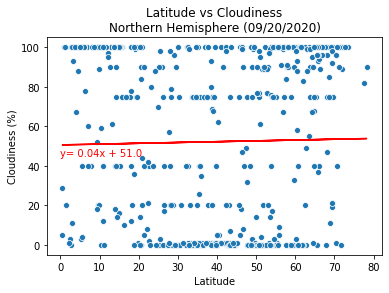

In [75]:
x_values=north_hemi["Lat"]
y_values=north_hemi["Cloudiness"]
sns.scatterplot(x=x_values, y=y_values)
plt.title("Latitude vs Cloudiness\nNorthern Hemisphere (09/20/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
(slope, intercept, rvalues, pvalue, stderr) = st.linregress(x_values, y_values)
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept))
regress = x_values * slope + intercept
plt.annotate(line_eq, (0, 45), color="red")
plt.plot(x_values, regress, "r-")
print(f"The r-value is: " + str(rvalues))
plt.savefig("Output/N_LatitudevsCloudiness.png")

The r-value is: 0.1454563096595102


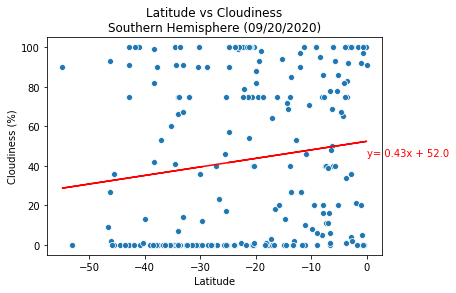

In [76]:
x_values=south_hemi["Lat"]
y_values=south_hemi["Cloudiness"]
sns.scatterplot(x=x_values, y=y_values)
plt.title("Latitude vs Cloudiness\nSouthern Hemisphere (09/20/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
(slope, intercept, rvalues, pvalue, stderr) = st.linregress(x_values, y_values)
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept))
regress = x_values * slope + intercept
plt.annotate(line_eq, (0, 45), color="red")
plt.plot(x_values, regress, "r-")
print(f"The r-value is: " + str(rvalues))
plt.savefig("Output/S_LatitudevsCloudiness.png")

The r-value is: 0.10210030557171772


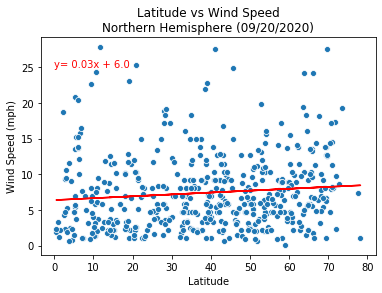

In [79]:
x_values=north_hemi["Lat"]
y_values=north_hemi["Wind Speed"]
sns.scatterplot(x=x_values, y=y_values)
plt.title("Latitude vs Wind Speed\nNorthern Hemisphere (09/20/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
(slope, intercept, rvalues, pvalue, stderr) = st.linregress(x_values, y_values)
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept))
regress = x_values * slope + intercept
plt.annotate(line_eq, (0, 25), color="red")
plt.plot(x_values, regress, "r-")
print(f"The r-value is: " + str(rvalues))
plt.savefig("Output/N_LatitudevsWindSpeed.png")

The r-value is: -0.18266415465322175


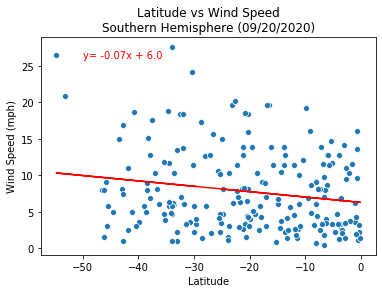

In [80]:
x_values=south_hemi["Lat"]
y_values=south_hemi["Wind Speed"]
sns.scatterplot(x=x_values, y=y_values)
plt.title("Latitude vs Wind Speed\nSouthern Hemisphere (09/20/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
(slope, intercept, rvalues, pvalue, stderr) = st.linregress(x_values, y_values)
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept))
regress = x_values * slope + intercept
plt.annotate(line_eq, (-50, 26), color="red")
plt.plot(x_values, regress, "r-")
print(f"The r-value is: " + str(rvalues))
plt.savefig("Output/S_LatitudevsWindSpeed.png")